# OBJECTIVE 3
CORRECTION using Data Assimilation - Perform Data Assimilation with the results of our RNN and our wildfires generative model. Data Assimilation is performed in a reduced space.

In [1]:
# import the necessary libraries and the DA.py and tools.py files,
# which provide additional functionality and implementations
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import tools
import DA

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
# read data and reshape them to the required shape for model
train_path = 'drive/MyDrive/Ferguson_fire_train.npy'
train = np.load(train_path)

test_path = 'drive/MyDrive/Ferguson_fire_test.npy'
test = np.load(test_path)

obs_path = 'drive/MyDrive/Ferguson_fire_obs.npy'
obs = np.load(obs_path)

In [4]:
px1 = train.shape[1]
px2 = train.shape[2]
px = px1*px2
train = train.reshape(-1,px1,px2,1)
test = test.reshape(-1,px1,px2,1)
obs = obs.reshape(-1,px1,px2,1)

In [5]:
# build and train the model for data compression
ae = DA.Autoencoder()
ae.train(train,train,test,test,epochs = 40)

Epoch 1/40
49/49 - 44s - loss: 0.5795 - val_loss: 0.5713 - 44s/epoch - 907ms/step
Epoch 2/40
49/49 - 14s - loss: 0.2212 - val_loss: 0.4630 - 14s/epoch - 285ms/step
Epoch 3/40
49/49 - 14s - loss: 0.1423 - val_loss: 0.3890 - 14s/epoch - 284ms/step
Epoch 4/40
49/49 - 14s - loss: 0.1237 - val_loss: 0.3195 - 14s/epoch - 284ms/step
Epoch 5/40
49/49 - 14s - loss: 0.1134 - val_loss: 0.2527 - 14s/epoch - 284ms/step
Epoch 6/40
49/49 - 14s - loss: 0.1058 - val_loss: 0.1944 - 14s/epoch - 285ms/step
Epoch 7/40
49/49 - 14s - loss: 0.0993 - val_loss: 0.1497 - 14s/epoch - 285ms/step
Epoch 8/40
49/49 - 14s - loss: 0.0934 - val_loss: 0.1192 - 14s/epoch - 284ms/step
Epoch 9/40
49/49 - 14s - loss: 0.0879 - val_loss: 0.0993 - 14s/epoch - 284ms/step
Epoch 10/40
49/49 - 14s - loss: 0.0828 - val_loss: 0.0864 - 14s/epoch - 283ms/step
Epoch 11/40
49/49 - 14s - loss: 0.0780 - val_loss: 0.0766 - 14s/epoch - 284ms/step
Epoch 12/40
49/49 - 14s - loss: 0.0737 - val_loss: 0.0698 - 14s/epoch - 284ms/step
Epoch 13/40
4

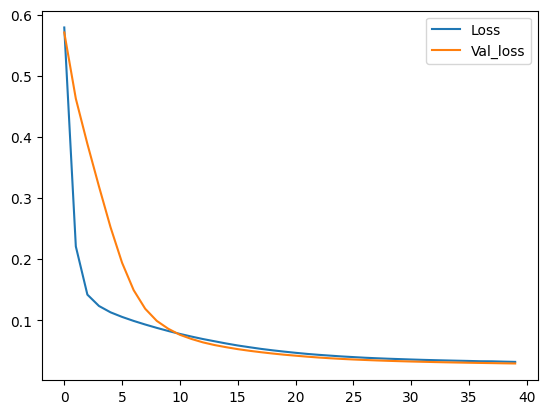

In [6]:
ae.plot_loss()

In [7]:
# initialize the DA class
enc = ae.encoder
dec = ae.decoder
da = DA.DataAssimilation(enc,dec,latent_dim=64, R_val=0.01)

## Generative AI

## Step 1
Compute the error covariance matrices for the background data (matrix B) and satellite data (matrix R) in the data assimilation model. The observation error covariance matrix R is usually diagonal. 



In [8]:
# read the predicted result from objective 2
vae_path = 'drive/MyDrive/vae_results.npy'
vae_result = np.load(vae_path)

In [9]:
vae_result = vae_result.reshape(-1,px1,px2,1)
print(vae_result.shape)

(4, 256, 256, 1)


In [10]:
# perform the data assimilation in latent space and reconstruct the updated predicted data in physical space
updated_dec = np.array(da.assimilate(vae_result, obs[1:]))
print(updated_dec.shape)

(4, 256, 256, 1)


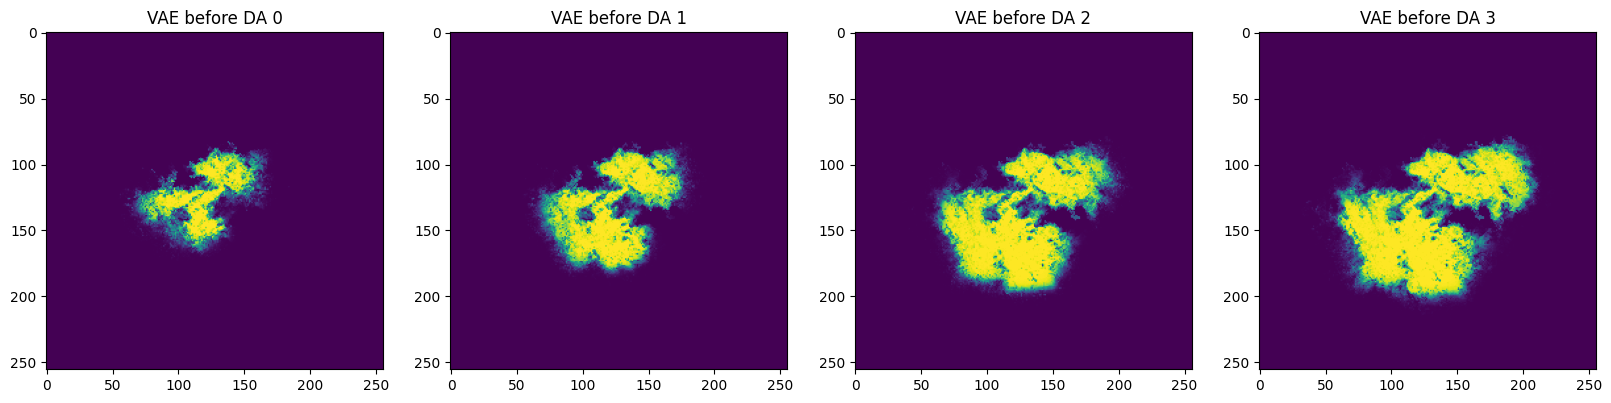

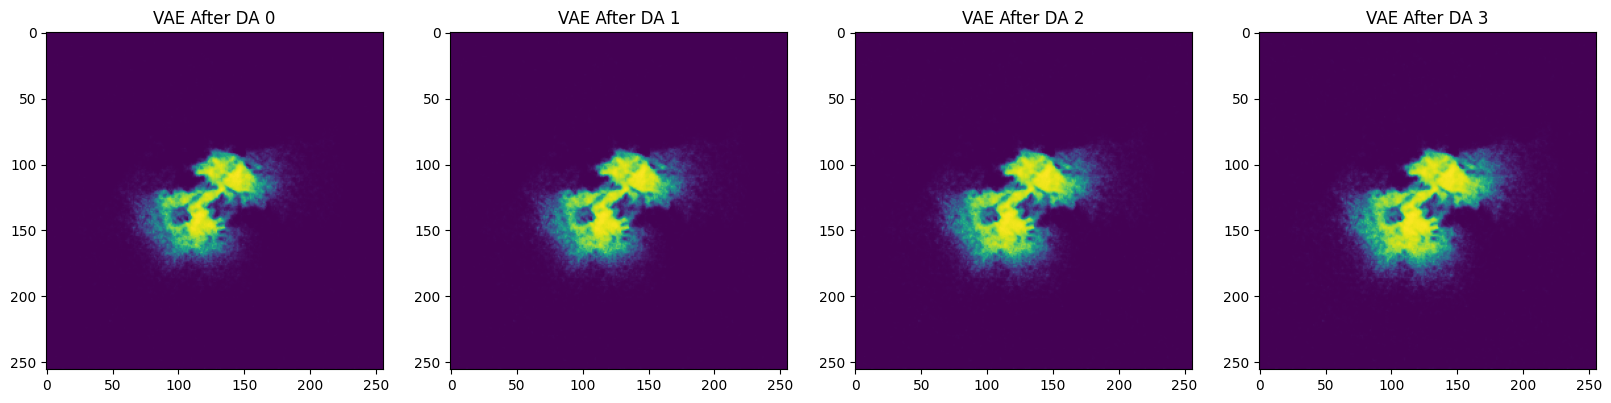

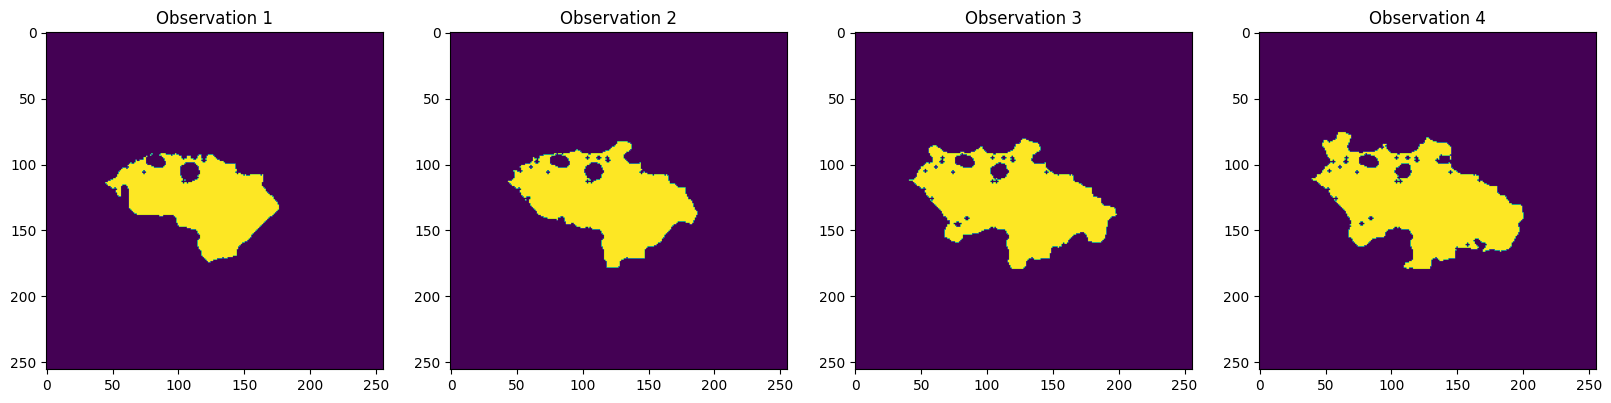

In [11]:
# plot and compare the data before and after DA
ts = [0,1,2,3]
tools.plot_data(vae_result.reshape(-1, px1, px2), ts, [f'VAE before DA {i}' for i in ts])
tools.plot_data(updated_dec.reshape(-1, px1, px2), ts, [f'VAE After DA {i}' for i in ts])
tools.plot_data(obs[1:].reshape(-1, px1, px2), ts, [f'Observation {i+1}' for i in ts])

## Step 2
perform data assimilation in a reduced space using satellite data (Ferguson_fire_obs) and background data (Ferguson_fire_background) and submit both code and MSE before and after performing DA.

In [12]:
# calculate the MSE before and after DA
# we can see the decrease in MSE
before = mean_squared_error(vae_result.reshape(-1,px), obs[1:].reshape(-1,px))
after = mean_squared_error(updated_dec.reshape(-1,px), obs[1:].reshape(-1,px))
print(f'Before DA: {before}')
print(f'After DA: {after}')

Before DA: 0.08121579463784923
After DA: 0.06873187907656134


## RNN

## Step 1

In [13]:
# read the predicted result from objective 1
lstm_path = 'drive/MyDrive/lstm_background_2ts.npy'
lstm_result = np.load(lstm_path)

In [14]:
# perform the data assimilation in latent space and reconstruct the updated predicted data in physical space
update_lstm_dec = np.array(da.assimilate(lstm_result,obs[2:].reshape(-1,px1,px2,1)))

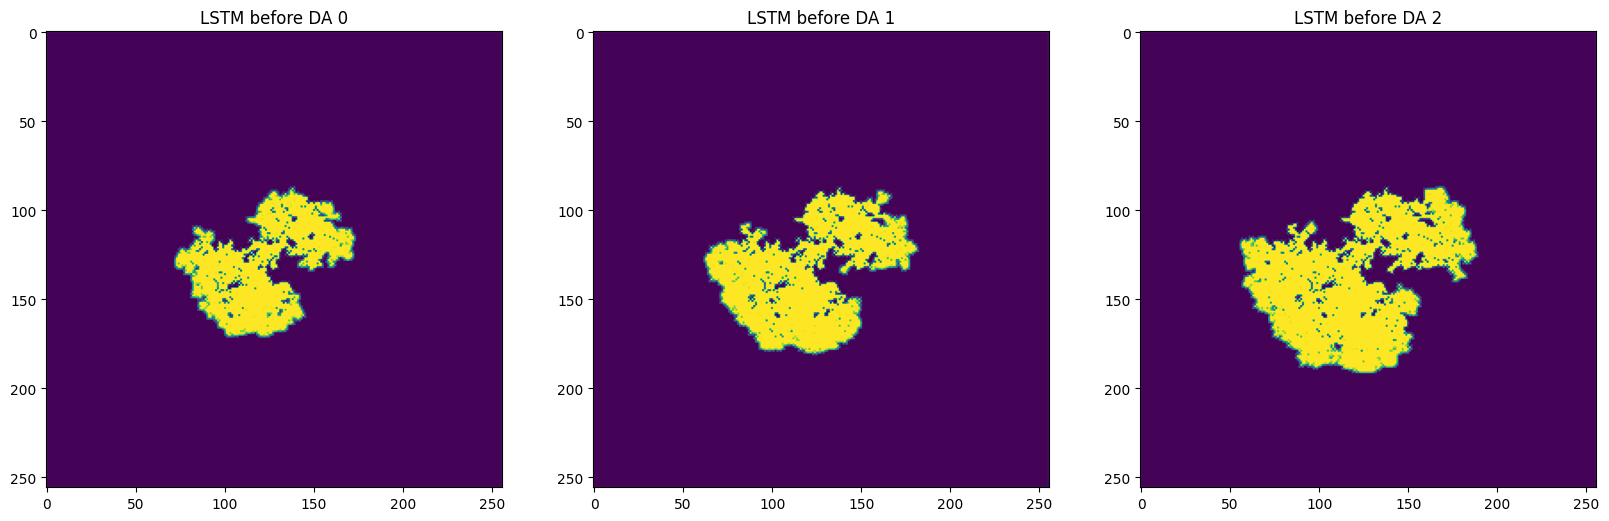

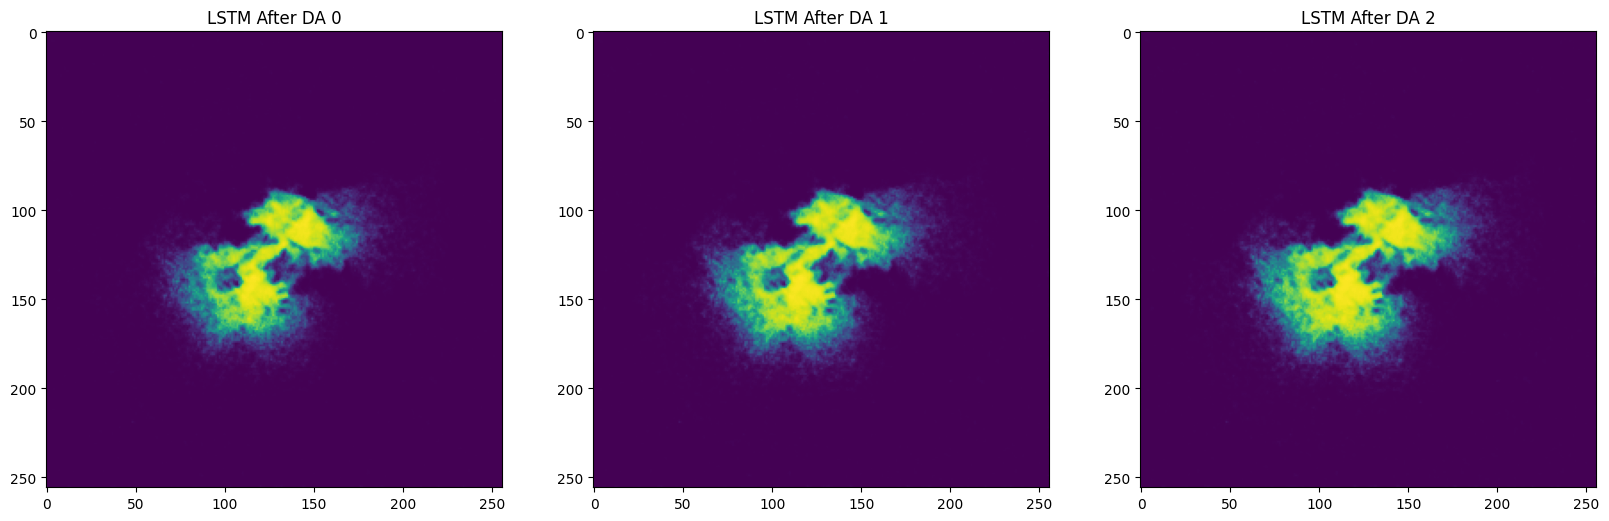

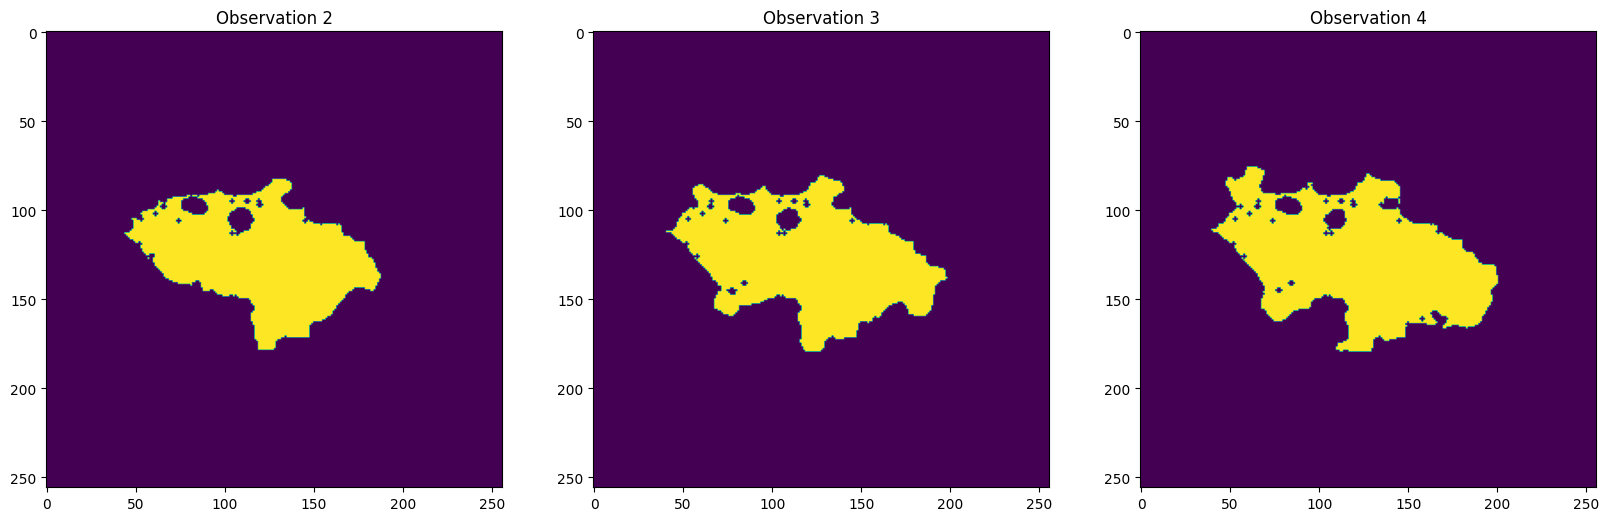

In [15]:
# plot and compare the data before and after DA
ts = [0,1,2]
tools.plot_data(lstm_result.reshape(-1, px1, px2), ts, [f'LSTM before DA {i}' for i in ts])
tools.plot_data(update_lstm_dec.reshape(-1, px1, px2), ts, [f'LSTM After DA {i}' for i in ts])
tools.plot_data(obs[2:].reshape(-1, px1, px2), ts, [f'Observation {i+2}' for i in ts])

## Step 2

In [16]:
# calculate the MSE before and after DA
# we can see the decrease in MSE
before = mean_squared_error(lstm_result.reshape(-1,px), obs[2:].reshape(-1,px))
after = mean_squared_error(update_lstm_dec.reshape(-1,px), obs[2:].reshape(-1,px))
print(f'LSTM Before DA: {before}')
print(f'LSTM After DA: {after}')

LSTM Before DA: 0.07653303521282381
LSTM After DA: 0.07367599431655258
